# Explore observation data

* In-situ (buoy/station) data
    - Water level
    - Currents
* Satellite altimetry data (water level)

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

In [1]:
import pandas as pd
import mikeio
import modelskill as ms
import helper as h

In [2]:
fldr = "../observations/" 
msh = mikeio.open("../input/mesh_EMOD.mesh")

## In-situ stations

Note: some station coordinates have been moved to fit within the model domain.

In [3]:
df_stn = pd.read_csv(fldr + "stations.csv", index_col=0)
df_stn

,Longitude,Latitude,Longitude_original,Latitude_original
Station,,,,
Drogden,12.7117,55.5358,NaN,NaN
Klagshamn,12.8920,55.5260,12.8936,55.5222
Barseback,12.9033,55.7564,NaN,NaN
Dragor,12.6833,55.6000,NaN,NaN
Flinten7,12.8445,55.5894,NaN,NaN
Helsingborg,12.6845,56.0412,NaN,NaN
Hornbaek,12.4660,56.0970,12.4667,56.1000
Kobenhavn,12.6500,55.7000,12.6000,55.7000
Koege,12.2000,55.4500,NaN,NaN


## Water level stations

In [4]:
wllist = h.get_wl_point_obs()

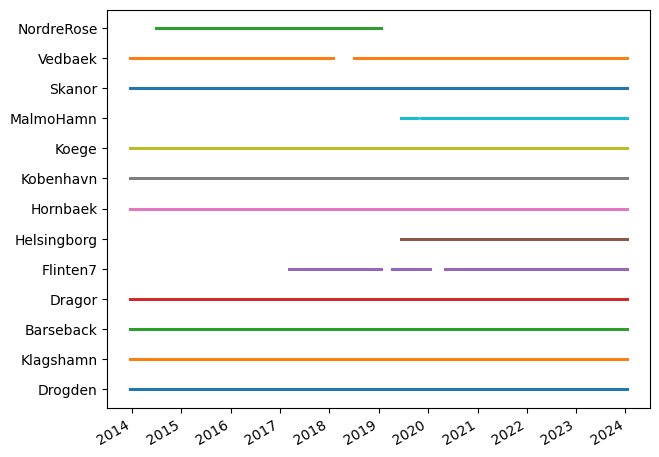

In [5]:
ms.plotting.temporal_coverage(wllist);

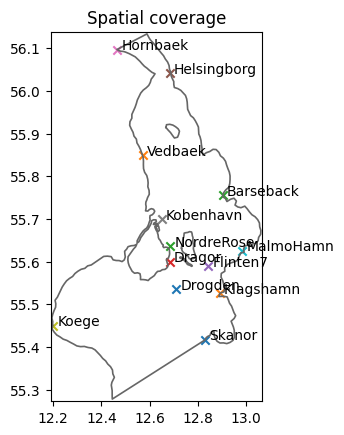

In [6]:
ms.plotting.spatial_overview(wllist, mod=msh.geometry);

## Current stations

In [7]:
ulist, _ = h.get_u_v_point_obs()

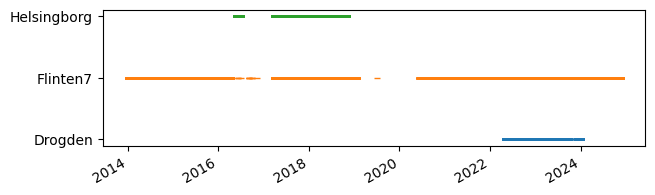

In [8]:
ms.plotting.temporal_coverage(ulist);

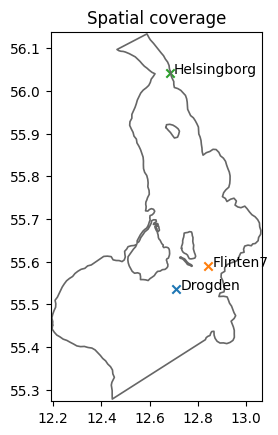

In [9]:
ms.plotting.spatial_overview(ulist, mod=msh.geometry);

## Altimetry 

In [10]:
altlist = h.get_altimetry_obs(quality=None)

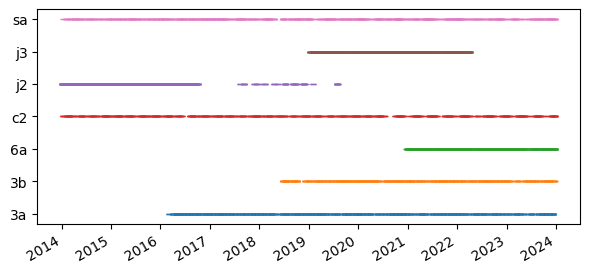

In [11]:
ms.plotting.temporal_coverage(altlist);

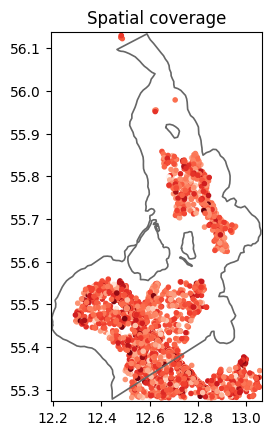

In [12]:
ms.plotting.spatial_overview(altlist, mod=msh.geometry);